David Mikhael

CS110 Final

Fall 2021

In [715]:
class HashTable_rolling:
    '''
    This class does the rolling hashign procedure given input parameters that are decided on
    '''
    def __init__(self, m, d, k):
        self.m = m #Sets the size for the hash table
        self.d = d #Sets the base of the hash function
        self.k = k #Sets the substring length
        self.hash_table = [None for _ in range(1000117)] #Sets the size for the hash table
    
    def insert_all(self,x):
        
        '''
        Creates the hash table
        
        Parameters
        -----------------------
        x: str - The text to test for plagiarism
        
        Inputs
        -----------------------
        k: int - the length of substring to look for
        
        Returns
        -----------------------
        None
        
        '''
        
        so_far_x = []
        #Initializes a list that stores letters in triplets whose hash is currently calculated
        #, from which I get the letter to be popped and to which I add the new letter for rolling
        k = self.k 
        key_0 = x[0:k] 
        #Takes k letters at a time
        node = Node(key_0, 0) 
        #Call the node class to make us of its attributes
        highest_power = len(key_0) - 1 
        #This is the power of the d base, starting from here is the hash function
        hash_target = ord(key_0[0]) * self.d**highest_power 
        so_far_x.append(x[0])
        for i in range(1,len(key_0)): 
            #Looping from the second element till the end of the first key
            highest_power -= 1 
            #The power of base d is decreased as we go to the right
            hash_target += ord(key_0[i]) * self.d**highest_power 
            #The hash value for the first letter in the first key
            so_far_x.append(x[i])
        hash_target_mod = hash_target % self.m 
        #This and the 4 lines above calculates the inital backbone hash value for the
        #first three letters
        if self.hash_table[hash_target_mod] is not None: 
            #Separate chaining: If there is a node at this hash value already, add our
            #node to the chain of the previous one
            node.nexto = self.hash_table[hash_target_mod]
        self.hash_table[hash_target_mod] = node 
        for i in range(1,len(x) - k + 1): 
            #Looping from the second key till the last one
            #The below lines of code until line 34 continues rolling after the first 3 letter
            key = x[i:i+k] 
            #Gets a new key by sliding to the right one position
            node = Node(key, i) 
            #Creates an object of the Node class of "first" attribute
            #of i
            so_far_x.append(key[-1]) 
            #Adds a new letter
            first = so_far_x.pop(0) 
            #Removes the first letter 
            hash_target = (hash_target - (ord(first) * self.d**(k-1))) * self.d 
            #Removes the hash value of the first letter and adjust the rest
            hash_target += ord(key[-1]) #Adds the hash value of the new letter
            hash_target_mod = hash_target % self.m
            if self.hash_table[hash_target_mod] is not None:
                node.nexto = self.hash_table[hash_target_mod]
            self.hash_table[hash_target_mod] = node #Same as above for separate chaining

    def search(self,x,y):
        
        '''
        Searches for a matching (plagiarized) key
        
        Parameters
        -----------------------
        x: str - The text to test for plagiarism
        y: str - The string to be matched with the original text
        
        Inputs
        -----------------------
        k: int - the length of substring to look for
        self.hash_table - list - the hash table
        
        Returns
        -----------------------
        where: tuple - the position of the first letters of matching substring
        
        '''
        so_far_y = [] 
        #The same as so_far_x
        k = self.k
        where = [] 
        #This stores the positions of the first letters of common substrings
        highest_power = k - 1
        hash_original = ord(y[0]) * self.d**highest_power
        so_far_y.append(y[0])
        for i in range(1,k): 
            #Looping through the first key
            highest_power -= 1
            hash_original += ord(y[i]) * self.d**highest_power  
            so_far_y.append(y[i])
        hash_original_mod = hash_original % self.m 
        #The above lines of code computes the hash value for the first three letters
        #in the same way as before
        cur = self.hash_table[hash_original_mod] #Store the key of the hash value from
        #the hash table as a new variable 
        while cur is not None: #If this key exists already in the hash table
            if cur.key == ''.join(so_far_y): #If the letters of this key match the
                #letters we are looking for
                where.append((cur.first, 0)) 
                #Get the indices of the first letter of these matching keys
            cur = cur.nexto 
            #Check for another adjacent match

        for i in range(k,len(y)): 
            #Looping through the rest of the keys
            so_far_y.append(y[i])
            first = so_far_y.pop(0)
            hash_original = (hash_original - (ord(first) * self.d**(k-1))) * self.d
            hash_original += ord(y[i]) 
            hash_original_mod = hash_original % self.m 
            #The above lines of code computes the hash value for rest of the letters
            #in the same way as before
            cur = self.hash_table[hash_original_mod]
            while cur is not None:
                if cur.key == ''.join(so_far_y):
                    where.append((cur.first, i-k+1)) #Here the index for y is not zero
                    #because we are rolling on y as well; the index for x is the "first"
                    #attribute of class Node.
                cur = cur.nexto 
                #The above lines search for a match in the same way as before

        return where
        
        
            
class Node:
    '''
    This hash table node stores the key and value pairs.
    Additionally, it has the attribute next and prev
    for us to traverse the linked list and go to the
    next node or previous node, respectively.
    '''
    def __init__(self, key, first, nexto= None, prev = None):
        self.key = key 
        #The key (3 letters)
        self.nexto= nexto 
        #The following key in a chain in separate hashing
        self.prev = prev 
        #The previous one
        self.first = first 
        #The index of the first element in a key
            
            
        
     

    
    

For collision resolution, I decided to use separate chaining instead of open addressing. Separate chaining has a time complexity of O(1+a) where a is the load ratio and equals n.keys/m. Open addressing, on the other hand, takes O(1/(1-a)) time for insert and search methods. Therefore, for a high load ratio, separate chaining, whose time relationship is linear, does exponentially better than open addressing. So, minimizing space complexity (m) as much as possible also leverages the benefits of separate chaining having a relatively more efficient runtime with high load ratios (to support its selection against open addressing). However, I needed to make sure I avoid collisions as much as possible, and that's why I don't want my base "d" to be small for hash values to be segregated. So, I chose m to be the smallest value possible that can hold all the k-long substrings and that is larger than the largest possible hash value of base "d" (given that k could be as large as 5; if k is larger then we might need to increase m). Note that the power of base d solves the problem of similar but different order substrings. I suppose that this plagiarism detector would be used for student submissions at Minerva. The average assignment length is 1200 words and let's say the average number of characters in each word is 4 characters. This gives me n.keys = 1200*4 / k keys needed to be inserted into the hash table slots. Increasing k means less slots needed but a higher hash value for each.

To satisfy all those constraints, benefit from the advantages of separate chaining, optimize segregation of hash values, and minimize space complexity, I selected m to be "1000117" considering that it should prime and thus lead to few collisions and away from a power of base 2, and d to be "16". Note also that the runtime of this separate chaining implementation will still be efficient if my detector was used for larger texts which adds to its practicality with different inputs. 

The code cell below is what helped me decide on the values I discussed.

In [713]:
ord("z") * 16**4 + ord("z") * 16**3 + ord("z") * 16**2 + ord("z") * 16 + ord("z")

8528410

In [716]:
test = HashTable_rolling(1000117, 16, 3)

test.insert_all('davidukij')

test.search('davidukij', 'avpdukij')

#test how the algorithm captures all instances of matches

[(4, 3), (5, 4), (6, 5)]

In [717]:
test = HashTable_rolling(1000117, 16, 3)

test.insert_all('davidukij')

test.search('davidukij', 'davi dukiji')

#test how the algorithm deals with space characters

[(0, 0), (1, 1), (4, 5), (5, 6), (6, 7)]

In [718]:
test = HashTable_rolling(1000117, 16, 3)

test.insert_all('davidukij')

test.search('davidukij', 'davi dujiki')

#test if the algorithm gets fooled by two substrings that have
#the same characters in a different order

[(0, 0), (1, 1)]

In [719]:
import math

class HashTable:
    def __init__(self, A, k, seed):
        self.A = A 
        #Sets the value for A
        self.k = k 
        #Sets the substring length
        self.hash_table = [None for _ in range(int(1e7))] 
        #Sets the table size
        self.seed = seed
        
    def hash_function_1(self, key0):
        ke = 0 
        #Creates a variable that stores the cumulative ASCII codes to
        #compute hash values
        for char in key0[:2]:
            ke += 1.5*ord(char) 
        for char in key0[2:]:
            ke += ord(char)
        #The hash function for the first two letters is different from
        #the rest
        A = self.A
        m = 2**16
        return math.floor(m*(ke*A % 1))
    
    def hash_function_2(self, key0):
        ke = 0
        for char in key0[:1]:
            ke += 1.8*ord(char)
        for char in key0[1:]:
            ke += 1.3*ord(char)
        #The hash function for the first letter is different from the rest
        A = self.A
        m = 2*18
        return math.floor(m*(ke*A % 1))

    def hash_function_3(self, key0):
        ke = 0
        for char in key0:
            ke += ord(char)
        A = self.A
        m = 2**20
        return math.floor(m*(ke*A % 1))
    
    def hash_function_4(self, key0):
        ke = 0
        for char in key0:
            ke += ord(char)
        A = self.A
        m = 2**22
        return math.floor(m*(ke*A % 1))
        
    
    def insert_all(self,x):
        k = self.k
        list_of_j = [x for x in range(4)] 
        #Creates a list of indices for hash functions to randomly chose from 
        random.seed(self.seed) 
        #Sets a seed so that searching for hash values is compatible with hash
        #values in the table
        j = random.choice(list_of_j) 
        #Picking a random one
        for i in range(0,len(x) - k + 1): 
            #Looping from the first element to the last element that can mark
            #a new key
            key = x[i:i+k] 
            #Defines a key of k letters at a time
            node = Node(key, i) 
            #Creates an object of the Node class of "first" attribute of i
            hashes = [self.hash_function_1(key), self.hash_function_2(key),
                      self.hash_function_3(key), self.hash_function_4(key)]
            our_hash = hashes[j] 
            #Picks the hash function of the index we randomly selection above
            if self.hash_table[our_hash] is not None: 
                #Separate chaining: If there is a node at this hash value already,
                #add our node to the chain of the previous one
                node.nexto = self.hash_table[our_hash]
            self.hash_table[our_hash] = node
            
    def search(self,x,y):
        where = [] 
        #This stores the positions of the first letters of common substrings
        k = self.k
        list_of_j = [x for x in range(4)]
        random.seed(self.seed)
        j = random.choice(list_of_j) 
        #Same as above
        for i in range(0,len(y) - k + 1):
            key = y[i:i+k]
            hashes = [self.hash_function_1(key), self.hash_function_2(key),
                      self.hash_function_3(key), self.hash_function_4(key)] 
            #Same as above
            cur = self.hash_table[hashes[j]] 
            #Store the key of the hash value from the hash table as a new variable 
            while cur is not None: 
                #If this key exists already in the hash table
                if cur.key == key: 
                    #If the letters of this key match the letters we are looking for
                    where.append((cur.first, i)) 
                    #Get the indices of the first letter of these matching keys
                cur = cur.nexto 
                #Check for another adjacent match

        return where
        
        
            
class Node:
    '''
    This hash table node stores the key and value pairs.
    Additionally, it has the attribute next and prev
    for us to traverse the linked list and go to the
    next node or previous node, respectively.
    '''
    def __init__(self, key, first, nexto= None, prev = None):
        self.key = key
        self.nexto= nexto 
        #The following key in a chain in separate hashing
        self.prev = prev 
        #The previous one
        self.first = first 
        #The index of the first element in a key

In this universal hashing algorithm, I had to decide on a value for A and for m. For A, I needed a value that, when mutiplied by the sum of ord() outputs, rarely yields an integer, for the remainder of its division by zero to exist. Cormen et., al. has the optimal value for A to be "(math.sqrt(5) - 1) / 2". 

m is a key variable that distinguishes my four different multiplicative hash functions. Therefore, and to ensure that each has hash function produce non-overlapping ranges of hash values, I had to make the m for each significantly different, and the m values large in general for the floor of (ke*A % 1)*m to be greater than zero in almost all cases. They are powers of 2 as Cormen et., al. advised. Although adjusting m doesn't help in preventing collisions when they happen, the use of universal hashing does. 

Therefore, I chose m values for my four functions to be 2^16, 2^18, 2^20, 2^22. The least possible table size that can hold all keys and include hash slots for the largest hash value is approximately 1e7. This will help me later when I compare both algorithm since I have the same table size in both and thus fixed space complexity and load ratios with the same input.

My hash functions are good because they avoid overlap and address cases of collision, on average. An experiment using my hash functions is in the last question.

Given all of this, the time complexity of this implementation is higher than the first one because we compute the hash function with each key from scratch (without rolling) and because collisions are not handled as efficiently. However, they have the same space complexity in terms of table size. I will expand on the comparison later.

Since a random hash function from a list of functions, with a different range of hash values, is chosen each time we initialize the function, we avoid worst-case collision scenarios from an adversary who knows our hash conditions. While searching, we use the same seed value to lookup keys based on hash values of the hash function that is randomly picked. One way to improve my algorithm is to re-chose a random hash function each time we find a collision and again set the seed for searching so that we avoid collisions while still maintaining searching functionality. For example, if we have a string "avivia" and we need to find common substrings with "via" and k = 3, normally a collision occurs because two keys have the same hash value (assuming we don't use powers as in rolling hashing). In this case, picking a random hash function each time, a one that might cause hashes of these two keys to be different, make us avoid worst-case complexities in such scenarios. My first two functions already have this functionality: the hash values of the first two (or one) letters are calculated differently from the rest. The only thing that my implementation misses is re-hashing whenever a collision is encountered and I am interested to compare the algorithm's behavior without this function now, and when I implement it in the future.

The code cell below is what helped me decide on the values I discussed.

In [714]:
A = (math.sqrt(5) - 1) / 2
m = 2**22


iasd = []

for i in range(1000):
    iasd.append(m*(i*A % 1))
    
max(iasd)

4192403.544693947

In [712]:
test = HashTable((math.sqrt(5) - 1) / 2, 3, 123)

test.insert_all('davidukij')

test.search('davidukij', 'avpdukij')


#test how the algorithm captures all instances of matches

[(4, 3), (5, 4), (6, 5)]

In [661]:
test = HashTable((math.sqrt(5) - 1) / 2, 3, 123)

test.insert_all('davidukij')

test.search('davidukij', 'davi dukiji')

#test how the algorithm deals with space characters

[(0, 0), (1, 1), (4, 5), (5, 6), (6, 7)]

In [720]:
test = HashTable((math.sqrt(5) - 1) / 2, 3, 123)

test.insert_all('davidukij')

test.search('davidukij', 'davi dujiki')

#test if the algorithm gets fooled by two substrings that
#have the same characters in a different order

[(0, 0), (1, 1)]

As I explained when I discussed my first implementation, my algorithmic design makes the plagiarism detector practical in terms of input sizes and choices of k. 

My detector works by taking an input text, chunking it into substrings of length k, computing the hash value of each using rolling hashing (in the first one) or universal multiplicative hashing (in the second one), and store them in a table. Let's say that this piece of text is a student's assignment submission and we want to see how substrings of length k are common between it and another student's submission. We then take the other piece of text, chunk it into keys, calculate the hash values for each using the same method used in the table, and search for each hash value in the table to see if its key exists (i.e. if the substring is common). It then returns the index, in each piece of text, that mark the beginning of each common substring.

One limitation of this is the choice of k. We need to look at common words; so, a large k could cross some words and thus ignore their match, and a small k could end up holding an uncomplete word. One possible solution to this is making the code stop whenever it sees a space and thus consider complete words only.

When it comes to space characters, my algorithm consider substrings that are separated by spaces as an entity, which is important for accurately and validly detecting plagiarism.

A brute-force algorithm would go through all substrings in a given window, one by one, in a piece of text and compare each to all subtrings within the same window size in another piece of text. We can still avoid the limitations presented by k and space characters in this algorithm. However, time complexity will be a function of O(mn) where m and n are the number of string windows in the two pieces of text.

In [721]:
import time
from numpy import random as rd

alphabet = [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
            'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

testing = "abc"

searching = "abc"

timely_rolling = []

timely = []

n = []

for a in range(100):
    
    testing += rd.choice(alphabet, replace= True)
    
    searching += rd.choice(alphabet, replace= True)

    #Iteratively and randomly increases the length of each string
    
    t1 = time.time()

    test_rolling = HashTable_rolling(1000117, 16, 3)

    test_rolling.insert_all(testing)

    test_rolling.search(testing, searching)

    t2 = time.time()

    test = HashTable((math.sqrt(5) - 1) / 2, 3, 123)

    test.insert_all(testing)

    test.search(testing, searching)

    t3 = time.time()
    
    timely_rolling.append(t2-t1)
    
    timely.append(t3-t2)
    


abcoqpnigjbcsasnulerxmpqkhsvkxezcmvqwphyfg a kn orsfvgacfetkdjtfcc uwvc vkgxcquoyyophhrbapsbiymilmvzci 


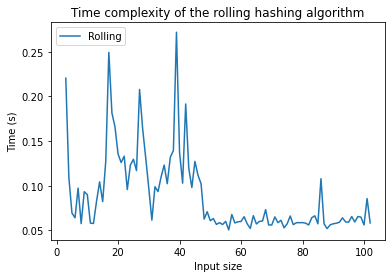

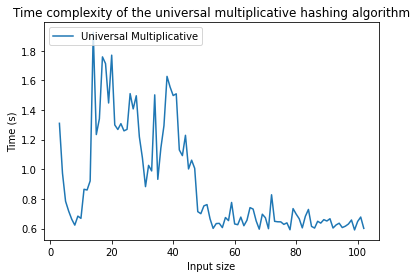

In [723]:
print(searching)

import matplotlib.pyplot as plt

x = list(range(3,103))

plt.plot(x,timely_rolling,label = "Rolling")
plt.title("Time complexity of the rolling hashing algorithm")
plt.ylabel("Time (s)")
plt.xlabel("Input size")
plt.legend(loc="upper left")
plt.show()


plt.plot(x,timely,label = "Universal Multiplicative")
plt.title("Time complexity of the universal multiplicative hashing algorithm")
plt.ylabel("Time (s)")
plt.xlabel("Input size")
plt.legend(loc="upper left")
plt.show()

From the experimental analysis plot, we can see that the time complexity of the rolling hashing algorithm is lower than that of the universal hashing as the number of letters in an input word increases. I already explained why this is the case when I discussed the universal hashing algorithm.


The time complexity for rolling hashing is O(n) to find the indices of all common substrings. Creating the hash table takes O(n) where n is the number of characters in the input we are passing through to calculate hash values. Searching for the key of a given hash value takes O(1) time for all keys because we don't have to compute hash values every time. Therefore, the runtime scales as a function of O(n) where n is the number of characters in the piece of text that we want to test for plagiarism. 

For the universal multiplicative hashing, since we compute hash values for all keys in both strings, the time complexity becomes O((m-n+1)n) where m is the length of the second string to be matched.

HCs:

 #algorithms: I created valid and efficient algorithmic strategies for each part of my plagiarism detector code. First, I focused on creating a code that works. Constructing an algorithmic code that results in the output I expect for each step is what I need to focus on before I consider time or space efficiency. Then, I did a reverse outline for those algorithmic steps and carefully went over them many times before I specifued which part of the algorithm I could refine to increase its efficiency. For example, I saw which parts have high time complexity and focus on them to improve time efficiency in the second algorithm. I also explained how I made those edits to show how I improve my algorithm.
 
 #constraints: This problem requires the use of hash tables, which we weren’t introduced to in class. This imposed an obstacle that must be overcome by getting familiar with hash tables and practicing them before I start incorporating them into my algorithm for detecting plagiarism. I did this by reading the resources mentioned in the problem description, and also looking for more videos explaining the topic since videos prove to be more effective for me to understand computational concepts. One constraint in my algorithm for universal multiplicative hashing is the still possible occurence of collisions, which I can overcome using the methods I mentioned.
 
 #audience: Based on the #CodeReadability feedback from my first assignment, I considered my application of this HC by editing my comments so that they effectively explain my code while at the same time considering the grader’s experience and they expect my comments to show. Initially I made comments that were exaggeratedly explaining my steps and that were too long, making my code not clearly readable. Therefore, I needed to make my code clear, my comments quick and clear, and suit the minds of the graders. I also made sure my comments are not redundant.
 
 
LOs:
 
The only LO that assignments feedback helped me to understand and apply better, because it was tailored to my answer, was #CodeReadability. I made sure my code is easy to follow and appropriately commented. I also made sure I included comprehensive docstrings for each function I use. I avoided redudancy and made sure all my statements are precise.